# Pytorch 中的数据增强方式最全解释

In [1]:
from torchvision import transforms
from PIL import Image
from torchvision.transforms import functional as TF
import torch

所有的变换

["Compose", "ToTensor", "ToPILImage", "Normalize", "Resize", "Scale", "CenterCrop", "Pad",
           "Lambda", "RandomApply", "RandomChoice", "RandomOrder", "RandomCrop", "RandomHorizontalFlip",
           "RandomVerticalFlip", "RandomResizedCrop", "RandomSizedCrop", "FiveCrop", "TenCrop", "LinearTransformation",
           "ColorJitter", "RandomRotation", "RandomAffine", "Grayscale", "RandomGrayscale",
           "RandomPerspective"]

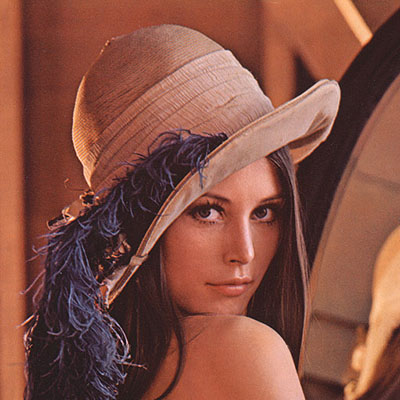

In [2]:
# 读取一张测试图片
path = "F:/jupyter/OpenCV-Python-Tutorial/Tutorial/sample_img/lena.jpg"
img = Image.open(path)
img

## 对 Torch 数据操作的变换

### ToPILImage
 Convert a tensor or an ndarray to PIL Image.

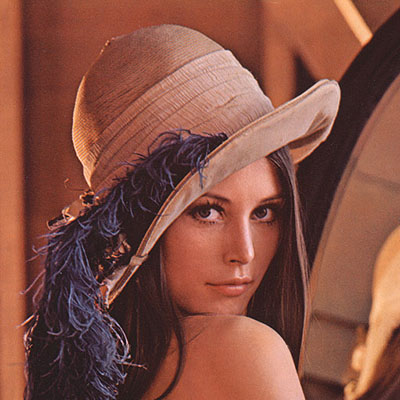

In [3]:
# 将 ``PIL Image`` or ``numpy.ndarray`` 转换成 tensor 再转成 PIL Image.
transform = transforms.Compose([
    transforms.ToTensor(), # Convert a ``PIL Image`` or ``numpy.ndarray`` to tensor.
    transforms.ToPILImage() # Convert a tensor or an ndarray to PIL Image.
])

new_img = transform(img)
new_img

### Normalize
提供一个所有通道的均值（mean） 和方差（std），会将原始数据进行归一化，操作的数据格式是 Tensor

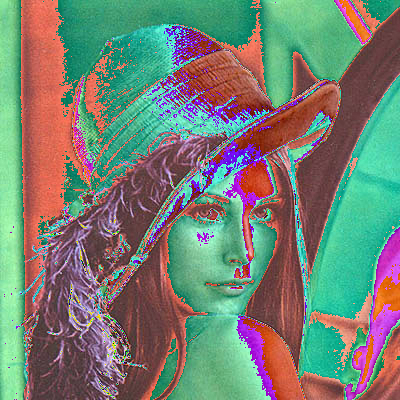

In [4]:
mean = [0.5, 0.5, 0.5]
std = [0.5, 0.5, 0.5]
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std), 
    transforms.ToPILImage() # 这里是为了可视化，故将其再转为 PIL，以下同理
])

new_img = transform(img)
new_img

## 对 PIL 数据操作的变换

### ToTensor
将 PIL Image 或者 numpy.ndarray 格式的数据转换成 tensor

In [8]:
transform = transforms.Compose([
    transforms.ToTensor(), # Convert a ``PIL Image`` or ``numpy.ndarray`` to tensor.
])

new_img = transform(img)

### Resize
Resize the input PIL Image to the given size.

参数
- size: 一个值的话，高和宽共享，否则对应是 (h, w)
- interpolation: 插值方式 默认 PIL.Image.BILINEAR


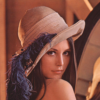

In [9]:
size = (100, 100)
transform = transforms.Compose([
    transforms.Resize(size),
])

new_img = transform(img)
new_img

### Scale
这个已经废弃，由 Resize 替代

### CenterCrop
Crops the given PIL Image at the center.
 裁剪一定 size 的图片，以图片的中心往外

参数
- size: 一个值的话，高和宽共享，否则对应是 (h, w)，若是该值超过原始图片尺寸，则外围用 0 填充


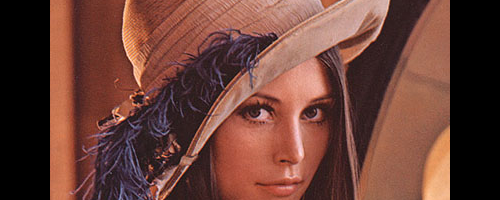

In [10]:
size = (200, 500)
transform = transforms.Compose([
    transforms.CenterCrop(size),
])

new_img = transform(img)
new_img

### Pad
Pad the given PIL Image on all sides with the given "pad" value. 填充图片的外部轮廓 PIL 数据格式

参数
- padding：填充的宽度，可以是一个 值、或者元组，分别对应 4 个边
- fill：填充的值，可以是一个值（所有通道都用该值填充），或者一个 3 元组（RGB 三通道） 当 padding_mode=constant 起作用
- padding_mode：填充的模式：constant, edge（填充值为边缘）, reflect(从边缘往内一个像素开始做镜像) or symmetric（从边缘做镜像）.

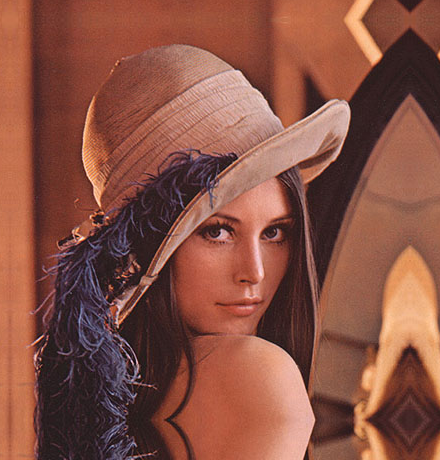

In [11]:
padding = (10, 20, 30, 40)
transform = transforms.Compose([
    transforms.Pad(padding, padding_mode="symmetric"), 
])

new_img = transform(img)
new_img

### Lambda
根据用户自定义的方式进行变换


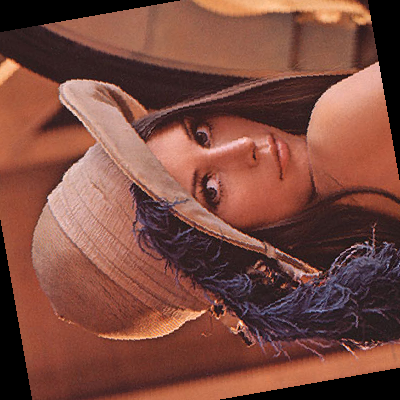

In [12]:
lambd = lambda x: TF.rotate(x, 100)
transform = transforms.Compose([
    transforms.Lambda(lambd)
])

new_img = transform(img)
new_img

### RandomApply
给定一定概率从一组 transformations 应用

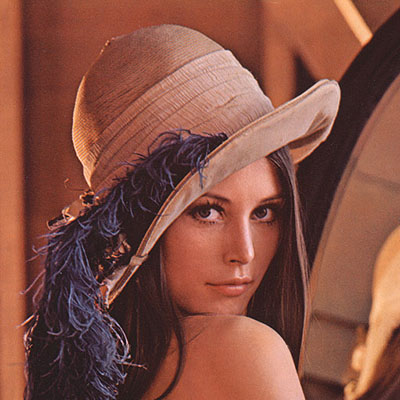

In [13]:
transform = [transforms.Pad(100, fill=(0, 255, 255)), transforms.CenterCrop(100), transforms.RandomRotation(20)]
transform = transforms.Compose([
    transforms.RandomApply(transform, p=0.5)
])

new_img = transform(img)
new_img

### RandomChoice
Apply single transformation randomly picked from a list

随机从一组变换中选择一个

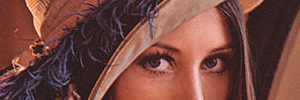

In [14]:
transform = [transforms.Pad(100, fill=(0, 255, 255)), transforms.CenterCrop((100, 300))]
transform = transforms.Compose([
    transforms.RandomChoice(transform)
])

new_img = transform(img)
new_img

### RandomOrder
Apply a list of transformations in a random order

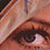

In [15]:
transform = [transforms.Pad(100, fill=(0, 255, 255)), transforms.CenterCrop((50, 50))]
transform = transforms.Compose([
    transforms.RandomOrder(transform)
])

new_img = transform(img)
new_img

### RandomCrop
Crop the given PIL Image at a random location. 随机进行裁剪

参数：
- size
- padding=None
- pad_if_needed=False
- fill=0
- padding_mode='constant'

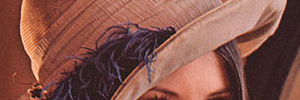

In [16]:
transform = transforms.Compose([
    transforms.RandomCrop((100, 300))
])

new_img = transform(img)
new_img

### RandomHorizontalFlip & RandomVerticalFlip
Horizontally/Vertically  flip the given PIL Image randomly with a given probability. 按一定概率进行水平/竖直翻转

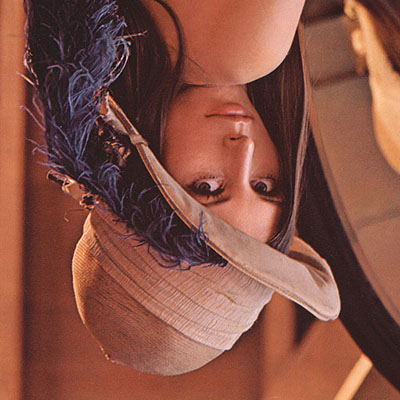

In [19]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5)
])

new_img = transform(img)
new_img

### RandomResizedCrop
Crop the given PIL Image to random size and aspect ratio. 裁剪给定的 PIL 图像到随机的尺寸和长宽比。

参数：
- size: expected output size of each edge
- scale: range of size of the origin size cropped
- ratio: range of aspect ratio of the origin aspect ratio cropped
- interpolation: Default: PIL.Image.BILINEAR

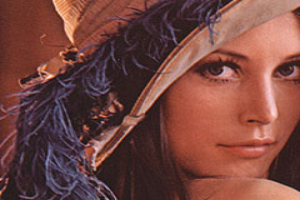

In [20]:
transform = transforms.Compose([
    transforms.RandomResizedCrop((200, 300))
])

new_img = transform(img)
new_img

### RandomSizedCrop
已经废弃，由 RandomResizedCrop. 取代了

### FiveCrop
将给定的 PIL 图像裁剪成四个角和中间的裁剪

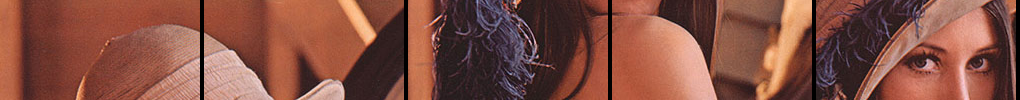

In [21]:
UNIT_SIZE = 200 # 每张图片的宽度是固定的
size = (100, UNIT_SIZE)
transform = transforms.Compose([
    transforms.FiveCrop(size)
])

new_img = transform(img)
delta = 20  # 偏移量，几个图片间隔看起来比较明显
new_img_2 = Image.new("RGB", (UNIT_SIZE*5+delta, 100))
top_right = 0
for im in new_img:
    new_img_2.paste(im, (top_right, 0)) # 将image复制到target的指定位置中
    top_right += UNIT_SIZE + int(delta/5) # 左上角的坐标，因为是横向的图片，所以只需要 x 轴的值变化就行

new_img_2

### TenCrop
裁剪一张图片的 4 个角以及中间得到指定大小的图片，并且进行水平翻转/竖直翻转 共 10 张

参数：
- size
- vertical_flip=False (默认是水平翻转)

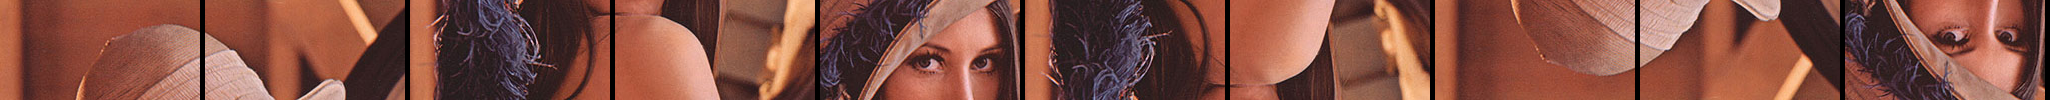

In [22]:
UNIT_SIZE = 200 # 每张图片的宽度是固定的
size = (100, UNIT_SIZE)

transform = transforms.Compose([
    transforms.TenCrop(size, vertical_flip=True)
])

new_img = transform(img)

delta = 50  # 偏移量，几个图片间隔看起来比较明显
new_img_2 = Image.new("RGB", (UNIT_SIZE*10+delta, 100))
top_right = 0
for im in new_img:
    new_img_2.paste(im, (top_right, 0)) # 将image复制到target的指定位置中
    top_right += UNIT_SIZE + int(delta/10) # 左上角的坐标，因为是横向的图片，所以只需要 x 轴的值变化就行

new_img_2

### LinearTransformation
白化变换，笔者不是很理解，但是好像消耗的内存应该比较大

### ColorJitter
Randomly change the brightness, contrast and saturation of an image. 随机改变图像的亮度、对比度和饱和度

参数：
- brightness：亮度
- contrast：对比度
- saturation：饱和度
- hue：色调  0<= hue <= 0.5 or -0.5 <= min <= max <= 0.5.

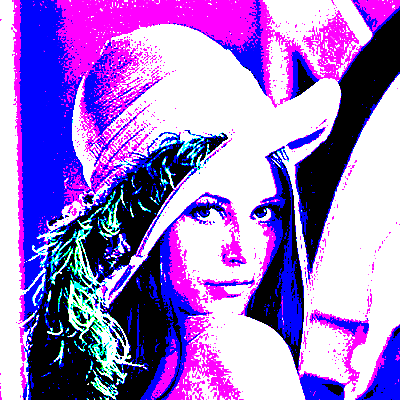

In [23]:
transform = transforms.Compose([
    transforms.ColorJitter(brightness=(0, 36), contrast=(
        0, 10), saturation=(0, 25), hue=(-0.5, 0.5))
])

new_img = transform(img)
new_img

### RandomRotation
一定角度旋转图像

参数：
- degrees：旋转的角度
- resample=False：重采样过滤器 可选{PIL.Image.NEAREST, PIL.Image.BILINEAR, PIL.Image.BICUBIC}
- expand=False：如果为 True ，则展开输出，使其足够大以容纳整个旋转后的图像。 如果为 Fales 或省略，使输出图像的大小与输入图像相同。
- center=None 旋转中心

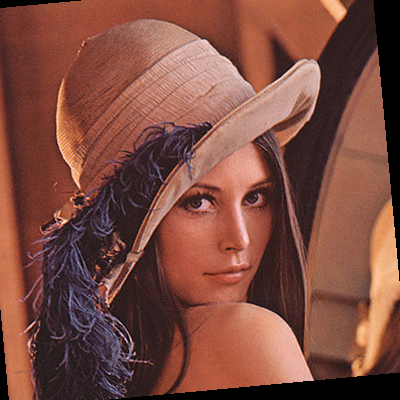

In [25]:
transform = transforms.Compose([
    transforms.RandomRotation(30, resample=Image.BICUBIC, expand=False, center=(100, 300))
])

new_img = transform(img)
new_img

### RandomAffine
保持图像中心不变的随机仿射变换，可以进行随心所欲的变化

参数：
- degrees：旋转角度
- translate：水平偏移
- scale:
- shear: 裁剪
- resample ({PIL.Image.NEAREST, PIL.Image.BILINEAR, PIL.Image.BICUBIC}, optional)
- fillcolor:图像外部填充颜色  int

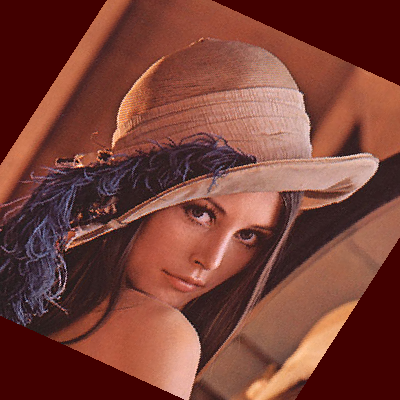

In [26]:
transform = transforms.Compose([
    transforms.RandomAffine(degrees=30, translate=(0, 0.2), scale=(0.9, 1), shear=(6, 9), fillcolor=66)
])

new_img = transform(img)
new_img

### Grayscale
转换图像灰度。

参数：
- num_output_channels：1 或者 3  输出图像所需的通道数(若是 3 的话，则代表三个通道的值是一样的)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
shape: (400, 400, 3)


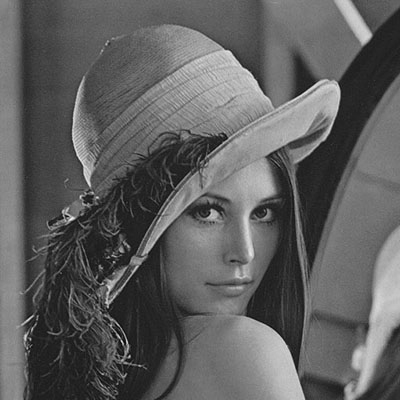

In [27]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3)
])

new_img = transform(img)
new_img_array = np.array(new_img)
r, g, b = new_img_array[:, :, 0], new_img_array[:, :, 1], new_img_array[:, :, 2]
print(r == b)
print("shape:", new_img_array.shape)
new_img

### RandomGrayscale
Randomly convert image to grayscale with a probability of p (default 0.1). 以一定的概率对图像进行灰度化，转换后的图片还是 3 通道的

(400, 400, 3)


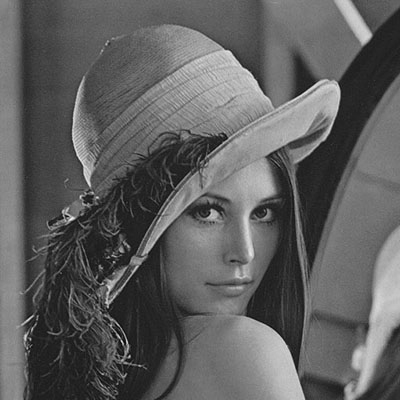

In [29]:
transform = transforms.Compose([
    transforms.RandomGrayscale(p=0.6)
])

new_img = transform(img)
print(np.array(new_img).shape)
new_img

### RandomPerspective
对给定的PIL图像以给定的概率随机进行透视变换。

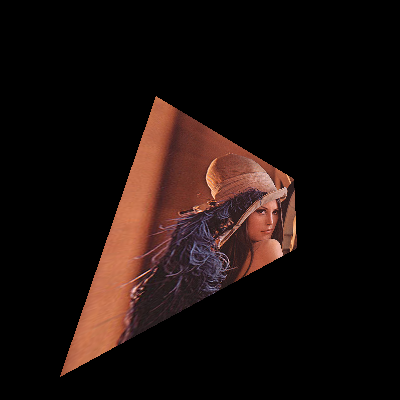

In [30]:
transform = transforms.Compose([
    transforms.RandomPerspective(distortion_scale=1, p=1, interpolation=3)
])

new_img = transform(img)
new_img

## 其他
`transforms.Compose` 函数是将几个变化整合在一起的，变换是有顺序的，需要注意是变换函数是对 PIL 数据格式进行还是 Torch 数据格式进行变换
